In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    import scipy
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

def proportions_confint_diff_rel(sample1, sample2, alpha = 0.05):
    import scipy
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    sample = list(zip(sample1, sample2))
    n = len(sample)
        
    f = sum([1 if (x[0] == 1 and x[1] == 0) else 0 for x in sample])
    g = sum([1 if (x[0] == 0 and x[1] == 1) else 0 for x in sample])
    
    left_boundary = float(f - g) / n  - z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    right_boundary = float(f - g) / n  + z * np.sqrt(float((f + g)) / n**2 - float((f - g)**2) / n**3)
    return (left_boundary, right_boundary)

___
# week1 Quiz 2 Hypothesis

___
По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

**Гипотеза $H_0$**: уровень стресса в компании не отличается от среднего  
**Альтернатива $H_1$**: уровень стресса отличается от среднего  

Преположим что распределение генеральной выборки – биномиальное с $p = 0.75$

In [3]:
poll_stress = np.concatenate((np.ones(75), np.zeros(100-75)))
company_stress = np.concatenate((np.ones(67), np.zeros(100-67)))

In [4]:
proportions_confint_diff_ind(poll_stress, company_stress)

(-0.04528447925164636, 0.20528447925164628)

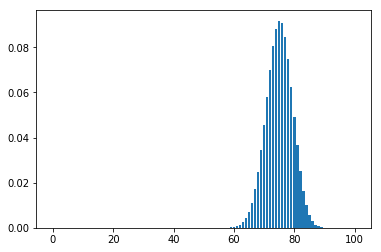

In [5]:
F_H0 = sts.binom(100, 0.75)

plt.bar(np.linspace(0,100,101), F_H0.pmf(np.linspace(0,100,101)));

In [6]:
sts.binom_test(67, 100, 0.75)

0.08222258891386608

In [7]:
sts.binom_test(22, 50, 0.75)

3.4831478978300243e-06

___
The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).


In [8]:
df = pd.read_csv('data/pines.txt', sep='\t')
df.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [10]:
binned_trees = sts.binned_statistic_2d(
    df['we'], df['sn'], None, bins=[5,5], statistic='count')

/Users/artem/miniconda3/envs/mldaspec/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


In [11]:
tr_distr = binned_trees.statistic.reshape(25,)
print(tr_distr.mean())
print(tr_distr)

23.36
[18. 14. 12.  8.  7. 26. 12. 24. 19.  8. 29. 22. 15. 31. 37. 25. 34. 50.
 50. 27. 20. 25. 37.  7. 27.]


___
Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [76]:
chi2 = sts.chi2(df=24)
chi2.ppf(0.95)

36.41502850180731

In [77]:
sts.chi2(df=24).ppf(0.95)

36.41502850180731

In [57]:
sts.chisquare(tr_distr, np.full(25, tr_distr.mean()), ddof=0)

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

((150.59 > 36.42) & pvalue $\rightarrow$0) $\Rightarrow$ гипотеза $H_0$  о том, что распределение деревьев – равномерное неверна!

___
Насколько велико это значение? Если нулевая гипотеза справедлива, с какой вероятностью его можно было получить случайно?

Нулевое распределение статистики — хи-квадрат с 25−1=24 степенями свободы (поскольку у равномерного распределения, с которым мы сравниваем данные, нет ни одного оцениваемого по выборке параметра, число степеней свободы K−1, где K — количество интервалов).

**Посчитайте достигаемый уровень значимости.**

Если вы используете функцию scipy.stats.chi2.cdf, в качестве значения параметра df нужно взять 24 (это число степеней свободы); если функцию scipy.stats.chisquare — параметр ddof нужно брать равным 0 (это как раз количество параметров теоретического распределения, оцениваемых по выборке).

Отвергается ли гипотеза равномерности на уровне значимости 0.05?

In [61]:
sts.chisquare(tr_distr, np.full(25, tr_distr.mean()), ddof=0).pvalue

2.574669774967279e-20